# Case study on Pre-processing

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset into python environment

In [145]:
data=pd.read_csv(r'C:\Users\acer\Downloads\titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [147]:
data = pd.read_csv(r'C:\Users\acer\Downloads\titanic_dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset


In [148]:
data.shape

(891, 11)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [150]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4. Fill in all the missing values present in all the columns in the dataset

In [151]:
#Since alot of values are mixing in the column cabin we can delete it.
data.drop('Cabin',axis=1,inplace=True)

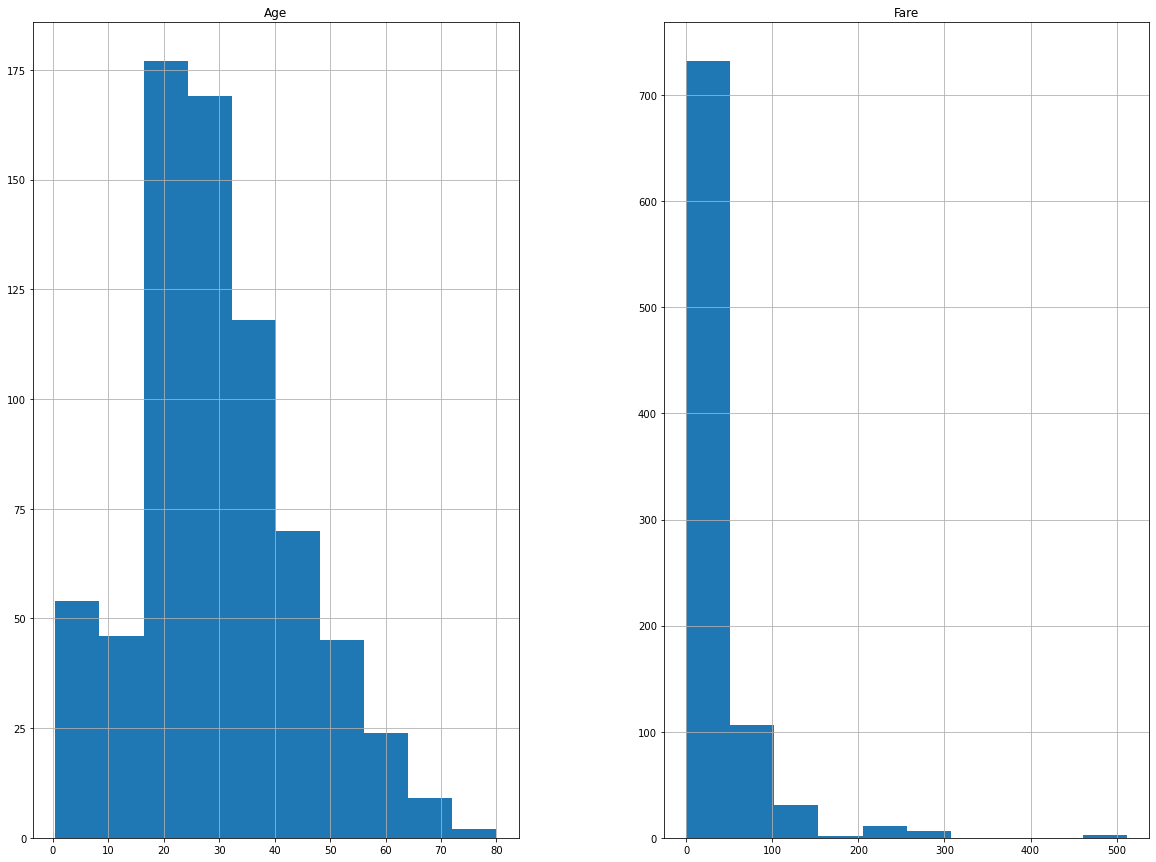

In [152]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [186]:
#Filling the missing values in the column 'Age' with the median and the missing values in 'Embarked' with the 
#most frequent values.
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

Checking and handling outliers in 'SibSp'

Text(0.5, 1.0, 'Box plot of SibSp')

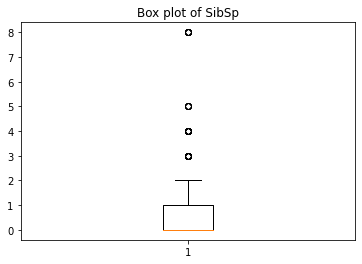

In [154]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [155]:
#finding different quartile values of spirit service column
Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [156]:
#to find interquartile range
IQR = Q3 - Q1
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print(low_limit)
print(up_limit)

-1.5
2.5


In [157]:
outlier = []
for x in data['SibSp']:
    if x < low_limit or x > up_limit:
        outlier.append(x)

In [158]:
print(outlier)

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [159]:
ind1 = data['SibSp']>up_limit
data.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [160]:
data.drop([ 8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

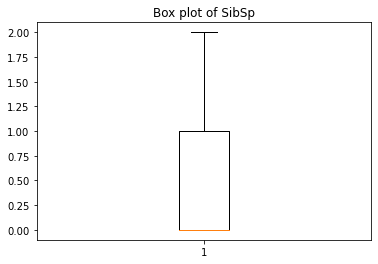

In [161]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

Text(0.5, 1.0, 'Box plot of Parch')

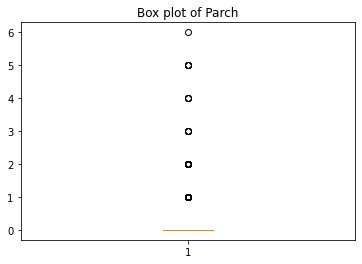

In [162]:
plt.boxplot(data['Parch'])
plt.title('Box plot of Parch')

In [163]:
Q1 = np.percentile(data['Parch'],25,interpolation='midpoint')
Q2 = np.percentile(data['Parch'],50,interpolation='midpoint')
Q3 = np.percentile(data['Parch'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [164]:
IQR = Q3 - Q1
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print(low_limit)
print(up_limit)

0.0
0.0


In [165]:
outlier = []
for x in data['Parch']:
    if x < low_limit or x > up_limit:
        outlier.append(x)

In [166]:
print(outlier)

[2, 1, 5, 5, 2, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 3, 4, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 5, 2, 1, 1, 1, 1, 5, 1, 1, 1, 2, 1, 6, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 5, 2]


In [167]:
np.set_printoptions(threshold=np.inf)

In [168]:
ind1 = data['Parch']>up_limit
index=data.loc[ind1].index
index




Int64Index([  9,  11,  14,  26,  44,  55,  59,  66,  79,  87,
            ...
            854, 856, 857, 859, 870, 872, 880, 881, 886, 889],
           dtype='int64', name='PassengerId', length=169)

In [169]:
data.drop(index,inplace=True)

Text(0.5, 1.0, 'Box plot of Parch')

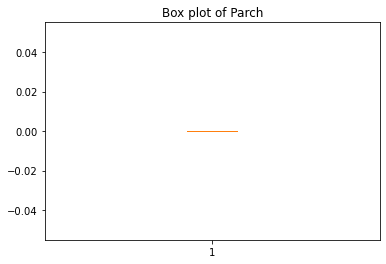

In [170]:
plt.boxplot(data['Parch'])
plt.title('Box plot of Parch')

Text(0.5, 1.0, 'Box plot of Fare')

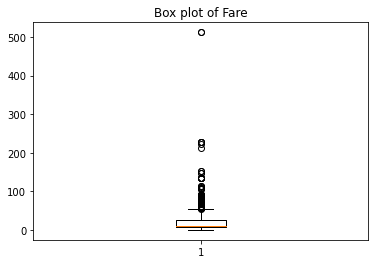

In [171]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [172]:
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.8542
10.5
26.0


In [173]:
IQR = Q3 - Q1
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print(low_limit)
print(up_limit)

-19.364500000000003
53.2187


In [174]:
outlier = []
for x in data['Fare']:
    if x < low_limit or x > up_limit:
        outlier.append(x)

In [175]:
print(outlier)

[71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 56.4958, 61.175, 73.5, 79.2, 66.6, 56.4958, 146.5208, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 135.6333, 77.9583, 78.85, 91.0792, 110.8833, 108.9, 56.9292, 83.1583, 135.6333, 133.65, 66.6, 134.5, 75.25, 69.3, 55.4417, 135.6333, 82.1708, 227.525, 73.5, 113.275, 90.0, 55.9, 89.1042, 91.0792, 90.0, 78.2667, 86.5, 108.9, 56.4958, 59.4, 93.5, 221.7792, 106.425, 106.425, 227.525, 55.9, 78.2667, 56.9292, 153.4625, 77.9583, 69.3, 56.4958, 76.7292, 73.5, 133.65, 73.5, 76.7292, 57.0, 56.4958, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 86.5, 77.9583, 57.0, 79.2, 56.4958, 80.0, 56.4958, 89.1042]


In [176]:
ind1 = data['Fare']>up_limit
index=data.loc[ind1].index
index


Int64Index([  2,  32,  35,  53,  62,  63,  73,  75,  93, 121, 140, 152, 170,
            196, 216, 219, 225, 231, 246, 257, 258, 259, 270, 276, 291, 292,
            307, 308, 310, 311, 326, 335, 337, 338, 367, 370, 371, 374, 376,
            381, 386, 394, 413, 435, 454, 485, 487, 497, 505, 506, 510, 514,
            521, 528, 538, 545, 558, 578, 592, 600, 610, 628, 642, 644, 646,
            656, 661, 666, 682, 691, 693, 701, 709, 717, 731, 738, 742, 760,
            766, 782, 790, 827, 830, 839, 850],
           dtype='int64', name='PassengerId')

In [177]:
data.drop(index,inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

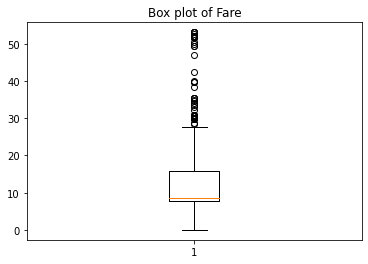

In [178]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [179]:
data.shape

(591, 10)

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [180]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [181]:
x = data[['Pclass', 'Age', 'SibSp', 'Parch', 
                'Fare']]
y = data['Survived']

In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [183]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [184]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,predictions))

MSE is 0.1977700223863335


In [185]:
from sklearn.metrics import r2_score
print('R quared value is:',r2_score(y_test,predictions))

R quared value is: 0.06271041264629551
